## Import the required libraries 

In [107]:
import numpy as np
import pandas as pd
import pybaseball as pyb 
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore') 




In [ ]:
######You have to import all of the data in chunks then combine the data frames, I find it simple to do it by month

In [ ]:
#import events from the pybaseball statcast functionality from this season
df1 = pyb.statcast('2021-04-01', '2021-05-01')  
df2 = pyb.statcast('2021-05-01', '2021-06-01')  
df3 = pyb.statcast('2021-07-01', '2021-08-01')  
df4 = pyb.statcast('2021-09-01', '2021-10-01')  

dfs = [df1,df2,df3,df4] 
pitches = pd.concat(dfs)
print('The data will include {0} Events'.format(len(pitches)))  

###### This will create a column the marks the batted ball event a hit or an out 

In [90]:
#label hit or out by event
pitches.loc[(pitches['events'] == 'single') | (pitches['events'] == 'double')| (pitches['events'] == 'triple')| (pitches['events'] == 'home_run'), 'hit_out'] = 'hit'  
pitches.loc[(pitches['events'] != 'single') & (pitches['events'] != 'double') & (pitches['events'] != 'triple') & (pitches['events'] != 'home_run'), 'hit_out'] = 'out' 

###### We only want to use events where the ball was put into play, this is the 'X' in the 'type' column

In [91]:
pitches = pitches.loc[(pitches['type']=='X')]


#### Machine learnining model passed through a function called 'model'

In [67]:
def model(data,xbh_grouping,out_grouping):
    data = data.loc[:,['launch_angle',
                       'launch_speed',
                       'hit_distance_sc','events'
                       ]]
    #this drops any NaN values in the above columns, since those are the ones we are interested in
    data = data.dropna()
    
    #this will group these events as extra base hits in our model
    def hit_type(x):
        if x=='home_run' or x=='double' or x=='triple':
            return 'xbh_grouping'
        return x
    
    if xbh_grouping == True:
        data['events'] = data['events'].apply(hit_type) 
    
    #this will group these events as outs in our model
    def outs(x):
        if x=='double_play' or x=='field_out' or x=='fielders_choice' or x=='force_out'or x=='grounded_into_double_play'or x=='sac_fly' or x=='sac_fly_double_play'or x=='sac_bunt'or x=='fielders_choice_out',or x=='triple_play'or x=='other_out':
            return 'out_grouping'
        return x
    
    if out_grouping == True:
        data['events'] = data['events'].apply(outs)
    
    X = data.loc[:,['launch_angle',
                       'launch_speed',
                       'hit_distance_sc',
                       ]]
    y = data.loc[:,['events']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
    
    dt_model = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=50)
    
    dt_model.fit(X_train, y_train)
    
    predictions = dt_model.predict(X_train)
    print('Training Score Accuracy {0}'.format(accuracy_score(predictions, y_train)))
    
    predictions = dt_model.predict(X_test)
    print('Test Score Accuracy {0}'.format(accuracy_score(predictions, y_test)))
    
    print(classification_report(predictions, y_test))

In [65]:
model(pitches,xbh_grouping=False,out_grouping = False)

Training Score Accuracy 0.7151644651644652
Test Score Accuracy 0.6899766899766899
                           precision    recall  f1-score   support

                   double       0.13      0.32      0.18        91
              double_play       0.00      0.00      0.00         0
              field_error       0.00      0.00      0.00         2
                field_out       0.90      0.71      0.80      2822
          fielders_choice       0.00      0.00      0.00         1
      fielders_choice_out       0.00      0.00      0.00         0
                force_out       0.00      0.00      0.00         0
grounded_into_double_play       0.00      0.00      0.00         0
                 home_run       0.69      0.78      0.73       177
                 sac_bunt       0.71      0.58      0.64        26
                  sac_fly       0.00      0.00      0.00         2
      sac_fly_double_play       0.00      0.00      0.00         0
                   single       0.57      0.63

In [68]:
model(pitches,xbh_grouping=True,out_grouping = True)

Training Score Accuracy 0.7984330484330484
Test Score Accuracy 0.7814037814037814
              precision    recall  f1-score   support

 field_error       0.00      0.00      0.00         1
out_grouping       0.92      0.81      0.86      2914
      single       0.55      0.66      0.60       674
xbh_grouping       0.47      0.78      0.59       272

    accuracy                           0.78      3861
   macro avg       0.49      0.56      0.51      3861
weighted avg       0.82      0.78      0.80      3861



In [70]:
model(pitches,xbh_grouping=False,out_grouping = True)

Training Score Accuracy 0.7818723279862608
Test Score Accuracy 0.7700233849751534
              precision    recall  f1-score   support

      double       0.14      0.48      0.21       245
 field_error       0.00      0.00      0.00         2
    home_run       0.73      0.78      0.75       647
out_grouping       0.93      0.80      0.86     10463
      single       0.53      0.65      0.58      2327
      triple       0.00      0.00      0.00         0

    accuracy                           0.77     13684
   macro avg       0.39      0.45      0.40     13684
weighted avg       0.84      0.77      0.80     13684



In [71]:
model(pitches,xbh_grouping=True,out_grouping = False)

Training Score Accuracy 0.7174151350166259
Test Score Accuracy 0.7007453960830167
                           precision    recall  f1-score   support

              double_play       0.00      0.00      0.00         1
              field_error       0.00      0.00      0.00         0
                field_out       0.91      0.71      0.80     10060
          fielders_choice       0.00      0.00      0.00         0
      fielders_choice_out       0.00      0.00      0.00         0
                force_out       0.00      0.00      0.00         4
grounded_into_double_play       0.00      0.00      0.00         0
                 sac_bunt       0.45      0.49      0.47        78
                  sac_fly       0.00      0.00      0.00         0
      sac_fly_double_play       0.00      0.00      0.00         0
                   single       0.56      0.63      0.59      2498
             xbh_grouping       0.49      0.77      0.60      1043

                 accuracy                    

In [ ]:
#####This function is taken from pybaseball documentation

In [121]:
#function to plot stadium from pybaseball plotting csv
stadium = pd.read_csv('https://raw.githubusercontent.com/jldbc/pybaseball/master/pybaseball/data/mlbstadiums.csv')
stadium['y'] = stadium['y'] * -1
stadium = stadium.loc[:,'team':]
def plot_stadium(team, color):
    team_df = stadium[stadium['team'] == team.lower()]
    for i in stadium['segment'].unique():
        data = team_df[team_df['segment'] == i]
        plt.plot(data['x'],data['y'], linestyle = '-', color = color) 
    #plt.suptitle(team.capitalize(), y=.975, fontsize=15)
    #plt.title(team_df['location'].any(), fontsize=8)
    plt.axis('off')

In [ ]:
######Plot hits vs outs on a field, color is hit or out using hits as the measure, 

Text(0.5, 0.975, 'Hits or Outs field location')

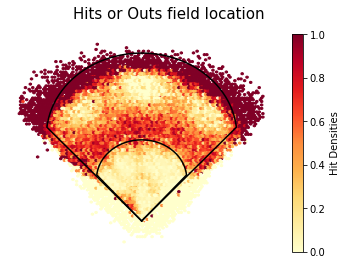

In [134]:
plot_stadium('generic','black') 
plt.hexbin(x=pitches['hc_x'], y=pitches['hc_y']*-1,C=pitches['hit_out']=='hit', cmap=plt.cm.YlOrRd)
cb = plt.colorbar()
cb.set_label('Hit Densities')  
plt.suptitle('Hits or Outs Field Location', y=.975, fontsize=15)
